In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import  train_test_split       # for train Test split
from sklearn.preprocessing import MinMaxScaler          # for rescaling 
from sklearn.metrics import r2_score                    # evaluating the model

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor


# Reading and Understanding the Data

In [2]:
# Reading the dataset
bike=pd.read_csv('day (1).csv')

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# shape of the dataset
bike.shape

(730, 16)

In [5]:
# Describing the numerical columns
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Info

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# count the null_values

bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### There are no null values present in the dataset

In [8]:
# Removing the Unnecessary columns

bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

##### As we know that we have to build our model taking cnt as the dependent variable , so we can easily remove the casual and registered column.

In [9]:
# checking the info

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [10]:
# changing the necessary datatype

cols=['season','yr','holiday','workingday','weathersit']

In [11]:
bike[cols]=bike[cols].astype('object')

In [12]:
# re-inspecting the info

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 68.6+ KB


In [13]:
# Replacing the season against their given names in the given data_dictionary.

bike['season'].replace([1,2,3,4],['spring','summer','fall','winter'],inplace=True)

In [14]:
# Replacing the weathersit against their given names in the given data_dictionary.

bike['weathersit'].replace([1,2,3,4],['clear','mist','light snow','heavy rain'],inplace=True)

In [15]:
# Giving suitable name to the month.

import calendar
bike['mnth'] = bike['mnth'].apply(lambda x: calendar.month_abbr[x])
bike['mnth'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [16]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,1600


### Doing some visualization stuff.

In [17]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 68.6+ KB


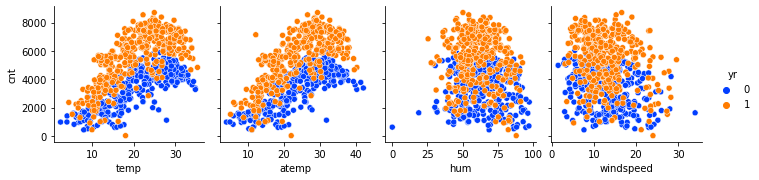

In [18]:
# Finding the relationship between our target variable and numerical variables by plotting scatter plot.

sns.pairplot(y_vars='cnt',x_vars=['temp','atemp','hum','windspeed'],data=bike,hue='yr',diag_kind=None,palette='bright')
plt.show()

##### 0=2018
##### 1=2019
##### Observation= 1. Here we see that as the temperature is  increasing, the cnt(count of sales) also increases.
#####                         2. Sales in 2019 is comparatively high as compared to 2018
#####                         3. temp and atemp are looking somewhat similar. So we can remove any of these columns.           

In [19]:
# Removing atemp

bike.drop('atemp',axis=1,inplace=True)

In [20]:
# Checking info

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 62.9+ KB


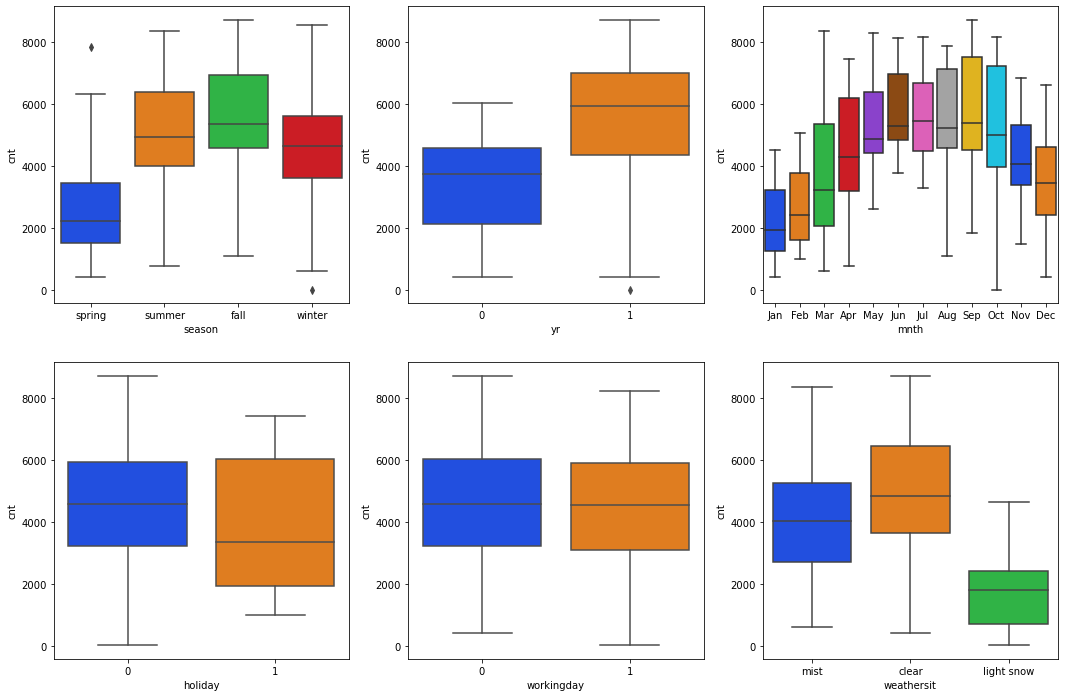

In [21]:
# Finding the relationship between our target variable and categorical variable using boxplot.
plt.figure(figsize=(18,12))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=bike,palette='bright')
plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=bike,palette='bright')
plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=bike,palette='bright')
plt.subplot(2,3,4)
sns.boxplot(x='holiday',y='cnt',data=bike,palette='bright')
plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=bike,palette='bright')
plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=bike,palette='bright')
plt.show()

##### Observations: 1. Maximum number of bike sales occur in fall season and from summer it gradually starts increasing.
##### 2. Year 2019 has maximum sales as compared to 2018 sales.
##### 3. March to September are the peak seasons.
##### 4. In the clear weather bike count is maximum.

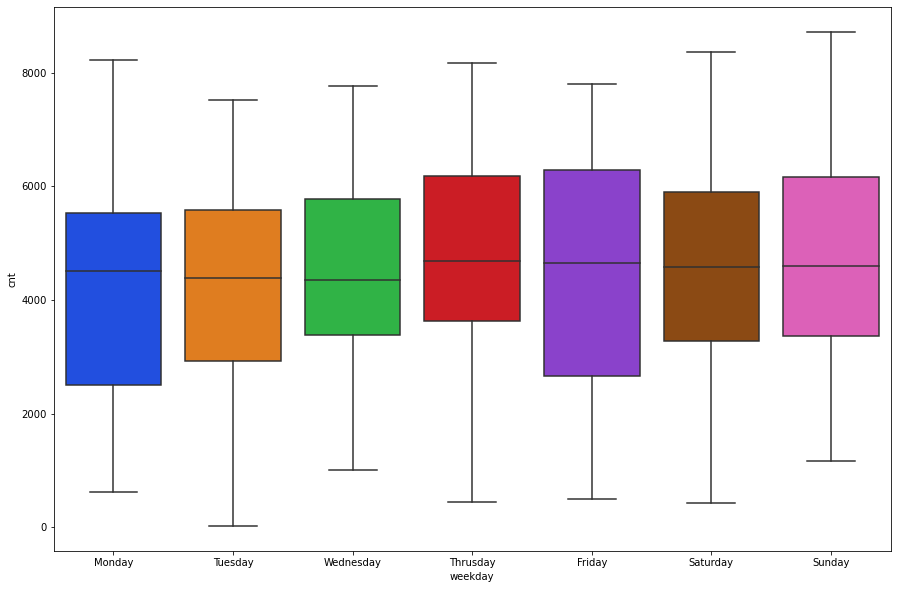

In [22]:
# Lets also look for weekday
bike.weekday = bike.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})


plt.figure(figsize=(15,10))
sns.boxplot(x='weekday',y='cnt',data=bike,palette='bright')
plt.show()

In [23]:
# Finding the co-relations.

a=bike.corr()
a

,temp,hum,windspeed,cnt
temp,1.000000,0.128565,-0.158186,0.627044
hum,0.128565,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.248506,1.000000,-0.235132
cnt,0.627044,-0.098543,-0.235132,1.000000


<AxesSubplot:>

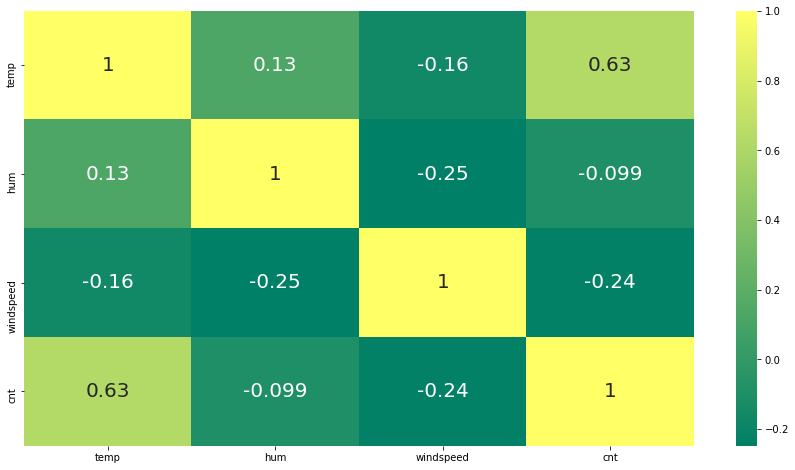

In [24]:
# Heatmaps

plt.figure(figsize=(15,8))
sns.heatmap(a,annot=True,cmap='summer' ,annot_kws={"size":20})

##### Temp has 0.63 co-relation with cnt (sales of bike)

### Creating Dummy Variable

In [25]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thrusday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,clear,9.305237,43.6957,12.522300,1600


In [26]:
# Creating Dummy variable
# Now  We see from the above head that there are 4 categorical columns , so we have to create dummy for that.

bike_dummy=pd.get_dummies(bike[['season','mnth','weekday','weathersit']],drop_first=True)

In [27]:
# bike_dummies

bike_dummy.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_light snow,weathersit_mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# concatinating this with our orignal bike dataframe

bike=pd.concat([bike,bike_dummy],axis=1)

In [29]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_light snow,weathersit_mist
0,spring,0,Jan,0,Monday,1,mist,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tuesday,1,mist,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,Wednesday,1,clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thrusday,1,clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Friday,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Dropping the orignals columns

bike = bike.drop(['season','mnth','weekday','weathersit'], axis=1)


In [31]:
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_light snow,weathersit_mist
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# shape 

bike.shape

(730, 29)

## Splitting the bike Data into Train_Test Split

In [33]:
# Train- Test Splitting

df_train,df_test=train_test_split(bike,train_size=0.7,random_state=100)

In [34]:
df_train.shape

(510, 29)

In [35]:
df_test.shape

(220, 29)

### Rescaling

In [36]:
# Here we are doing Min Max Scaling
# 1. Create an Object

scaler=MinMaxScaler()

# 2. Fit this MinMax Scaler on the numerical columns except for the dummy vars.

num_vars=['cnt','hum','windspeed','temp']

# 3. Fit on Data (all the values lies between 0 and 1)

df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_light snow,weathersit_mist
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [37]:
# all the values are between 0 and 1.
df_train.describe()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_light snow,weathersit_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Model Building

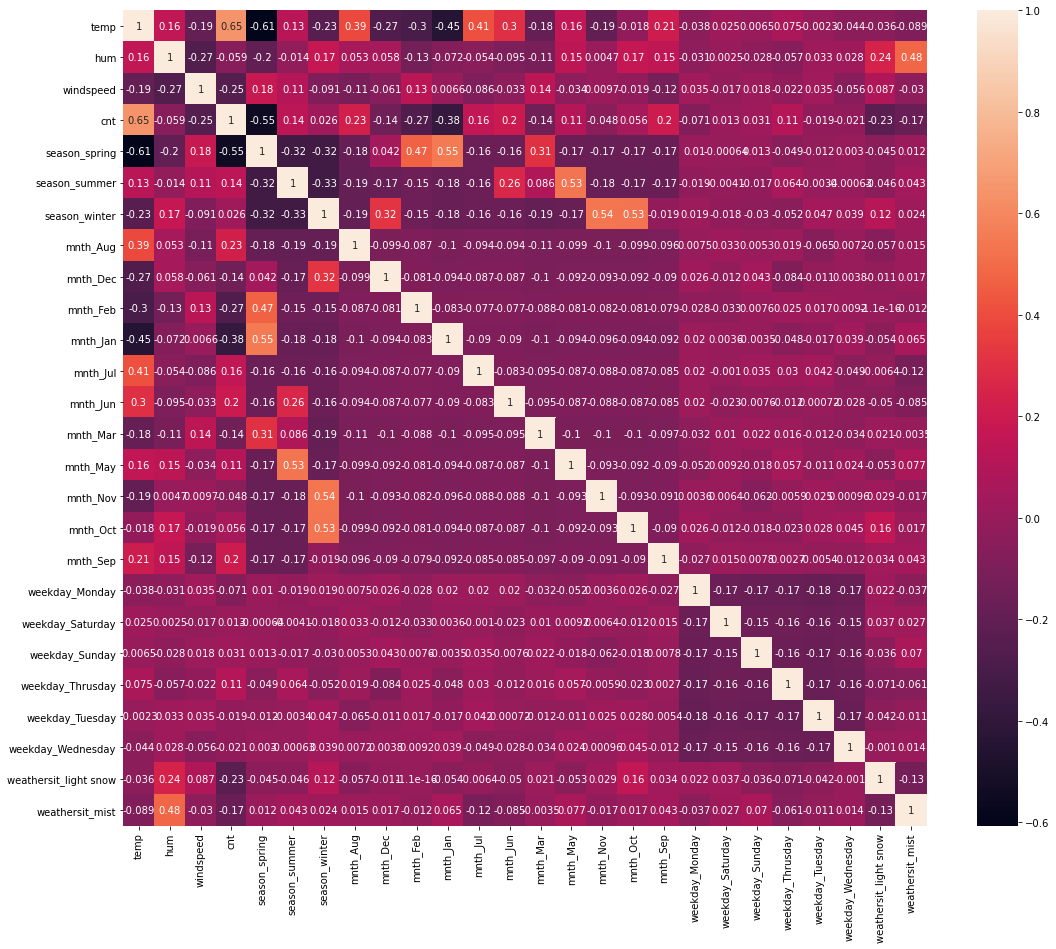

In [38]:
# ploting Heatmaps
plt.figure(figsize=(18,15))
sns.heatmap(df_train.corr() ,annot=True)
plt.show()



# Here we have to see which variable is most corelated to cnt as cnt is our target variable.

In [39]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_light snow,weathersit_mist
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [40]:
# Training the model (splitting the df_train into X_train and y_train)

y_train=df_train.pop('cnt')
X_train=df_train

In [41]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [42]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_light snow,weathersit_mist
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [43]:
# add a constant(temp has highest co relation with cnt , so i am taking temp as my first predictor variable)

X_train_sm=sm.add_constant(X_train['temp'])

# Create first Model

lr=sm.OLS(y_train,X_train_sm)

# fit

lr_model=lr.fit()

# params

lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [44]:
# summary of our first model

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Tue, 07 Sep 2021   Prob (F-statistic):           2.46e-61
Time:                        11:16:30   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thrusday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_light snow',
       'weathersit_mist'],
      dtype='object')

##### Conclusion= 1. Here 41.6 % variance in the cnt is explained by temperature.
##### 2. P values are 0 , therefore the model is statistically significant.

In [46]:
# adding the variable to build more good model.(mnth_Aug)

X_train_sm=X_train[['temp','mnth_Aug']]

X_train_sm=sm.add_constant(X_train_sm)

# Create second Model

lr=sm.OLS(y_train,X_train_sm)

# fit

lr_model=lr.fit()

# params

lr_model.params

const       0.165545
temp        0.650977
mnth_Aug   -0.019840
dtype: float64

In [47]:
# Summary

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     181.1
Date:                Tue, 07 Sep 2021   Prob (F-statistic):           4.57e-60
Time:                        11:16:30   Log-Likelihood:                 176.34
No. Observations:                 510   AIC:                            -346.7
Df Residuals:                     507   BIC:                            -334.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1655      0.020      8.174      0.000       0.126       0.205
temp           0.6510      0.037     17.808      0.000       0.579       0.723
mnth_Aug      -0.0198      0.028     -0.709      0.479      -0.075       0.035
==============================================================================
Omnibus:                        7.166   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                4.870
Skew:                           0.082   Prob(JB):                       0.0876
Kurtosis:                       2.550   Cond. No.                         6.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### 1. Here we see that the p value of the mnth_aug variable is very very high , that makes our model insignificant and our r-sq. also doesn't move.

In [48]:
# Now its getting tedious so what I am doing now is , I am adding all the variables , then remove all the statistically 
# insignificant variable.


X_train_sm=sm.add_constant(X_train)

# Create  Model

lr=sm.OLS(y_train,X_train_sm.astype(float))

# fit

lr_model1=lr.fit()

# summary

lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     97.49
Date:                Tue, 07 Sep 2021   Prob (F-statistic):          1.34e-178
Time:                        11:16:30   Log-Likelihood:                 522.99
No. Observations:                 510   AIC:                            -988.0
Df Residuals:                     481   BIC:                            -865.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3912      0.085      4.594      0.000       0.224       0.558
yr                        0.2311      0.008     28.384      0.000       0.215       0.247
holiday                  -0.1348      0.065     -2.059      0.040      -0.263      -0.006
workingday               -0.0600      0.071     -0.844      0.399      -0.200       0.080
temp                      0.4405      0.047      9.412      0.000       0.349       0.532
hum                      -0.1574      0.039     -4.043      0.000      -0.234      -0.081
windspeed                -0.1825      0.026     -7.003      0.000      -0.234      -0.131
season_spring            -0.0404      0.030     -1.335      0.182      -0.100       0.019
season_summer             0.0464      0.026      1.761      0.079      -0.005       0.098
season_winter             0.1126      0.028      3.994      0.000       0.057       0.168
mnth_Aug                  0.0273      0.034      0.806      0.421      -0.039       0.094
mnth_Dec                 -0.0444      0.034     -1.309      0.191      -0.111       0.022
mnth_Feb                 -0.0374      0.033     -1.123      0.262      -0.103       0.028
mnth_Jan                 -0.0642      0.034     -1.894      0.059      -0.131       0.002
mnth_Jul                 -0.0285      0.035     -0.808      0.420      -0.098       0.041
mnth_Jun                  0.0084      0.025      0.336      0.737      -0.041       0.058
mnth_Mar                  0.0008      0.025      0.032      0.974      -0.048       0.050
mnth_May                  0.0247      0.021      1.164      0.245      -0.017       0.066
mnth_Nov                 -0.0396      0.037     -1.077      0.282      -0.112       0.033
mnth_Oct                  0.0056      0.036      0.156      0.876      -0.066       0.077
mnth_Sep                  0.0908      0.032      2.822      0.005       0.028       0.154
weekday_Monday           -0.0246      0.015     -1.687      0.092      -0.053       0.004
weekday_Saturday         -0.0557      0.072     -0.777      0.437      -0.197       0.085
weekday_Sunday           -0.0495      0.072     -0.691      0.490      -0.190       0.091
weekday_Thrusday          0.0042      0.015      0.282      0.778      -0.025       0.034
weekday_Tuesday          -0.0261      0.015     -1.774      0.077      -0.055       0.003
weekday_Wednesday        -0.0102      0.015     -0.669      0.504      -0.040       0.020
weathersit_light snow    -0.2499      0.027     -9.380      0.000      -0.302      -0.198
weathersit_mist          -0.0578      0.011     -5.495      0.000      -0.079      -0.037
==============================================================================
Omnibus:                       78.047   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarqu

In [49]:
X_train=X_train.astype(float)

In [50]:
# Calculating The VIF for calculating the multicollinearity

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,63.89
3,temp,43.77
4,hum,41.18
6,season_spring,13.50
8,season_winter,12.40
22,weekday_Sunday,12.34
21,weekday_Saturday,11.83
7,season_summer,9.85
17,mnth_Nov,7.16
18,mnth_Oct,6.82


As we know that , If the variables are statistically insignificant which is determined by P-values , we will drop first these columns so that our VIF gets decreased.

In [51]:
#  Dropping mnth_Mar because of highest P-value

X=X_train.drop('mnth_Mar',axis=1)

In [52]:
X_train_sm=sm.add_constant(X)

# Create  Model

lr=sm.OLS(y_train,X_train_sm.astype(float))

# fit

lr_model2=lr.fit()

# summary

lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.3
Date:                Tue, 07 Sep 2021   Prob (F-statistic):          1.32e-179
Time:                        11:16:30   Log-Likelihood:                 522.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     482   BIC:                            -871.4
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3917      0.084      4.684      0.000       0.227       0.556
yr                        0.2311      0.008     28.414      0.000       0.215       0.247
holiday                  -0.1348      0.065     -2.061      0.040      -0.263      -0.006
workingday               -0.0600      0.071     -0.845      0.399      -0.200       0.080
temp                      0.4403      0.046      9.550      0.000       0.350       0.531
hum                      -0.1573      0.039     -4.057      0.000      -0.233      -0.081
windspeed                -0.1825      0.026     -7.020      0.000      -0.234      -0.131
season_spring            -0.0401      0.029     -1.401      0.162      -0.096       0.016
season_summer             0.0463      0.026      1.790      0.074      -0.005       0.097
season_winter             0.1128      0.028      4.075      0.000       0.058       0.167
mnth_Aug                  0.0269      0.032      0.843      0.399      -0.036       0.090
mnth_Dec                 -0.0451      0.026     -1.718      0.086      -0.097       0.006
mnth_Feb                 -0.0382      0.022     -1.699      0.090      -0.082       0.006
mnth_Jan                 -0.0650      0.023     -2.883      0.004      -0.109      -0.021
mnth_Jul                 -0.0288      0.034     -0.858      0.391      -0.095       0.037
mnth_Jun                  0.0081      0.024      0.344      0.731      -0.038       0.055
mnth_May                  0.0245      0.020      1.233      0.218      -0.015       0.064
mnth_Nov                 -0.0402      0.031     -1.293      0.197      -0.101       0.021
mnth_Oct                  0.0050      0.031      0.162      0.871      -0.056       0.066
mnth_Sep                  0.0904      0.029      3.092      0.002       0.033       0.148
weekday_Monday           -0.0246      0.015     -1.692      0.091      -0.053       0.004
weekday_Saturday         -0.0557      0.072     -0.778      0.437      -0.196       0.085
weekday_Sunday           -0.0494      0.072     -0.691      0.490      -0.190       0.091
weekday_Thrusday          0.0042      0.015      0.283      0.778      -0.025       0.034
weekday_Tuesday          -0.0261      0.015     -1.778      0.076      -0.055       0.003
weekday_Wednesday        -0.0102      0.015     -0.671      0.503      -0.040       0.020
weathersit_light snow    -0.2499      0.027     -9.390      0.000      -0.302      -0.198
weathersit_mist          -0.0579      0.011     -5.502      0.000      -0.079      -0.037
==============================================================================
Omnibus:                       78.028   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.533
Skew:                          -0.762   Prob(JB):       

In [53]:
#  Dropping mnth_oct because of highest P-value

X=X.drop('mnth_Oct',axis=1)

In [54]:
X_train_sm=sm.add_constant(X)

# Create  Model

lr=sm.OLS(y_train,X_train_sm.astype(float))

# fit

lr_model3=lr.fit()

# summary

lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.4
Date:                Tue, 07 Sep 2021   Prob (F-statistic):          1.29e-180
Time:                        11:16:30   Log-Likelihood:                 522.97
No. Observations:                 510   AIC:                            -991.9
Df Residuals:                     483   BIC:                            -877.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3932      0.083      4.736      0.000       0.230       0.556
yr                        0.2311      0.008     28.466      0.000       0.215       0.247
holiday                  -0.1347      0.065     -2.062      0.040      -0.263      -0.006
workingday               -0.0603      0.071     -0.850      0.396      -0.200       0.079
temp                      0.4407      0.046      9.587      0.000       0.350       0.531
hum                      -0.1567      0.039     -4.065      0.000      -0.232      -0.081
windspeed                -0.1824      0.026     -7.026      0.000      -0.233      -0.131
season_spring            -0.0410      0.028     -1.467      0.143      -0.096       0.014
season_summer             0.0447      0.024      1.872      0.062      -0.002       0.092
season_winter             0.1149      0.024      4.701      0.000       0.067       0.163
mnth_Aug                  0.0249      0.029      0.848      0.397      -0.033       0.083
mnth_Dec                 -0.0481      0.019     -2.586      0.010      -0.085      -0.012
mnth_Feb                 -0.0390      0.022     -1.783      0.075      -0.082       0.004
mnth_Jan                 -0.0658      0.022     -2.991      0.003      -0.109      -0.023
mnth_Jul                 -0.0309      0.031     -0.990      0.323      -0.092       0.030
mnth_Jun                  0.0072      0.023      0.314      0.754      -0.038       0.052
mnth_May                  0.0241      0.020      1.224      0.222      -0.015       0.063
mnth_Nov                 -0.0441      0.019     -2.289      0.022      -0.082      -0.006
mnth_Sep                  0.0879      0.025      3.527      0.000       0.039       0.137
weekday_Monday           -0.0245      0.015     -1.687      0.092      -0.053       0.004
weekday_Saturday         -0.0559      0.072     -0.782      0.435      -0.196       0.085
weekday_Sunday           -0.0497      0.071     -0.696      0.487      -0.190       0.091
weekday_Thrusday          0.0043      0.015      0.285      0.776      -0.025       0.034
weekday_Tuesday          -0.0261      0.015     -1.779      0.076      -0.055       0.003
weekday_Wednesday        -0.0102      0.015     -0.668      0.504      -0.040       0.020
weathersit_light snow    -0.2498      0.027     -9.398      0.000      -0.302      -0.198
weathersit_mist          -0.0579      0.011     -5.514      0.000      -0.079      -0.037
==============================================================================
Omnibus:                       77.463   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.904
Skew:                          -0.758   Prob(JB):                     8.71e-45
Kurtosis:                       5.692   Cond. No.                  

In [55]:
#  Dropping weekday_Thrusday because of highest P-value

X=X.drop('weekday_Thrusday',axis=1) 

In [56]:
X_train_sm=sm.add_constant(X)

# Create  Model

lr=sm.OLS(y_train,X_train_sm.astype(float))

# fit

lr_model4=lr.fit()

# summary

lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     109.8
Date:                Tue, 07 Sep 2021   Prob (F-statistic):          1.27e-181
Time:                        11:16:30   Log-Likelihood:                 522.93
No. Observations:                 510   AIC:                            -993.9
Df Residuals:                     484   BIC:                            -883.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3953      0.083      4.785      0.000       0.233       0.558
yr                        0.2311      0.008     28.512      0.000       0.215       0.247
holiday                  -0.1347      0.065     -2.064      0.040      -0.263      -0.006
workingday               -0.0601      0.071     -0.848      0.397      -0.199       0.079
temp                      0.4409      0.046      9.600      0.000       0.351       0.531
hum                      -0.1570      0.038     -4.080      0.000      -0.233      -0.081
windspeed                -0.1825      0.026     -7.039      0.000      -0.233      -0.132
season_spring            -0.0412      0.028     -1.473      0.141      -0.096       0.014
season_summer             0.0448      0.024      1.881      0.061      -0.002       0.092
season_winter             0.1150      0.024      4.712      0.000       0.067       0.163
mnth_Aug                  0.0249      0.029      0.848      0.397      -0.033       0.083
mnth_Dec                 -0.0484      0.019     -2.609      0.009      -0.085      -0.012
mnth_Feb                 -0.0388      0.022     -1.775      0.077      -0.082       0.004
mnth_Jan                 -0.0658      0.022     -2.993      0.003      -0.109      -0.023
mnth_Jul                 -0.0307      0.031     -0.985      0.325      -0.092       0.031
mnth_Jun                  0.0068      0.023      0.299      0.765      -0.038       0.052
mnth_May                  0.0241      0.020      1.224      0.222      -0.015       0.063
mnth_Nov                 -0.0443      0.019     -2.302      0.022      -0.082      -0.006
mnth_Sep                  0.0879      0.025      3.528      0.000       0.039       0.137
weekday_Monday           -0.0266      0.013     -2.120      0.034      -0.051      -0.002
weekday_Saturday         -0.0578      0.071     -0.813      0.417      -0.198       0.082
weekday_Sunday           -0.0516      0.071     -0.726      0.468      -0.191       0.088
weekday_Tuesday          -0.0282      0.013     -2.234      0.026      -0.053      -0.003
weekday_Wednesday        -0.0123      0.013     -0.918      0.359      -0.039       0.014
weathersit_light snow    -0.2505      0.026     -9.476      0.000      -0.302      -0.199
weathersit_mist          -0.0580      0.010     -5.529      0.000      -0.079      -0.037
==============================================================================
Omnibus:                       77.776   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.211
Skew:                          -0.761   Prob(JB):                     4.53e-45
Kurtosis:                       5.701   Cond. No.                         69.7
==============================================================================

In [57]:
#  Dropping mnth_Jun because of highest P-value

X=X.drop('mnth_Jun',axis=1)

In [58]:
X_train_sm=sm.add_constant(X)

# Create  Model

lr=sm.OLS(y_train,X_train_sm.astype(float))

# fit

lr_model5=lr.fit()

# summary

lr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     114.6
Date:                Tue, 07 Sep 2021   Prob (F-statistic):          1.22e-182
Time:                        11:16:30   Log-Likelihood:                 522.88
No. Observations:                 510   AIC:                            -995.8
Df Residuals:                     485   BIC:                            -889.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3950      0.083      4.786      0.000       0.233       0.557
yr                        0.2309      0.008     28.619      0.000       0.215       0.247
holiday                  -0.1346      0.065     -2.064      0.040      -0.263      -0.006
workingday               -0.0593      0.071     -0.838      0.402      -0.198       0.080
temp                      0.4482      0.039     11.556      0.000       0.372       0.524
hum                      -0.1586      0.038     -4.164      0.000      -0.233      -0.084
windspeed                -0.1833      0.026     -7.121      0.000      -0.234      -0.133
season_spring            -0.0434      0.027     -1.618      0.106      -0.096       0.009
season_summer             0.0436      0.023      1.859      0.064      -0.002       0.090
season_winter             0.1125      0.023      4.917      0.000       0.068       0.157
mnth_Aug                  0.0198      0.024      0.830      0.407      -0.027       0.067
mnth_Dec                 -0.0476      0.018     -2.595      0.010      -0.084      -0.012
mnth_Feb                 -0.0379      0.022     -1.752      0.080      -0.080       0.005
mnth_Jan                 -0.0644      0.021     -3.003      0.003      -0.106      -0.022
mnth_Jul                 -0.0363      0.025     -1.459      0.145      -0.085       0.013
mnth_May                  0.0214      0.017      1.225      0.221      -0.013       0.056
mnth_Nov                 -0.0439      0.019     -2.288      0.023      -0.082      -0.006
mnth_Sep                  0.0842      0.022      3.896      0.000       0.042       0.127
weekday_Monday           -0.0263      0.013     -2.107      0.036      -0.051      -0.002
weekday_Saturday         -0.0570      0.071     -0.803      0.422      -0.197       0.083
weekday_Sunday           -0.0508      0.071     -0.716      0.474      -0.190       0.089
weekday_Tuesday          -0.0281      0.013     -2.228      0.026      -0.053      -0.003
weekday_Wednesday        -0.0122      0.013     -0.911      0.363      -0.038       0.014
weathersit_light snow    -0.2504      0.026     -9.481      0.000      -0.302      -0.199
weathersit_mist          -0.0578      0.010     -5.526      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       77.293   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.659
Skew:                          -0.760   Prob(JB):                     2.68e-44
Kurtosis:                       5.671   Cond. No.                         69.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

In [59]:
#  Dropping weekday_Sunday because of highest P-value

X=X.drop('weekday_Sunday',axis=1)

In [60]:
X_train_sm=sm.add_constant(X)

# Create  Model

lr=sm.OLS(y_train,X_train_sm.astype(float))

# fit

lr_model6=lr.fit()

# summary

lr_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     119.7
Date:                Tue, 07 Sep 2021   Prob (F-statistic):          1.42e-183
Time:                        11:16:30   Log-Likelihood:                 522.61
No. Observations:                 510   AIC:                            -997.2
Df Residuals:                     486   BIC:                            -895.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3436      0.041      8.442      0.000       0.264       0.424
yr                        0.2313      0.008     28.724      0.000       0.215       0.247
holiday                  -0.0926      0.029     -3.247      0.001      -0.149      -0.037
workingday               -0.0095      0.013     -0.732      0.465      -0.035       0.016
temp                      0.4490      0.039     11.588      0.000       0.373       0.525
hum                      -0.1575      0.038     -4.140      0.000      -0.232      -0.083
windspeed                -0.1838      0.026     -7.147      0.000      -0.234      -0.133
season_spring            -0.0431      0.027     -1.608      0.109      -0.096       0.010
season_summer             0.0437      0.023      1.863      0.063      -0.002       0.090
season_winter             0.1123      0.023      4.910      0.000       0.067       0.157
mnth_Aug                  0.0194      0.024      0.816      0.415      -0.027       0.066
mnth_Dec                 -0.0474      0.018     -2.584      0.010      -0.083      -0.011
mnth_Feb                 -0.0375      0.022     -1.736      0.083      -0.080       0.005
mnth_Jan                 -0.0641      0.021     -2.995      0.003      -0.106      -0.022
mnth_Jul                 -0.0367      0.025     -1.476      0.141      -0.085       0.012
mnth_May                  0.0211      0.017      1.209      0.227      -0.013       0.055
mnth_Nov                 -0.0451      0.019     -2.364      0.018      -0.083      -0.008
mnth_Sep                  0.0843      0.022      3.904      0.000       0.042       0.127
weekday_Monday           -0.0258      0.012     -2.069      0.039      -0.050      -0.001
weekday_Saturday         -0.0074      0.015     -0.483      0.629      -0.037       0.023
weekday_Tuesday          -0.0273      0.013     -2.174      0.030      -0.052      -0.003
weekday_Wednesday        -0.0109      0.013     -0.824      0.411      -0.037       0.015
weathersit_light snow    -0.2503      0.026     -9.480      0.000      -0.302      -0.198
weathersit_mist          -0.0578      0.010     -5.529      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       77.267   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.188
Skew:                          -0.765   Prob(JB):                     1.52e-43
Kurtosis:                       5.634   Cond. No.                         27.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
#  Dropping weekday_Saturday because of highest P-value

X=X.drop('weekday_Saturday',axis=1)

In [62]:
X_train_sm=sm.add_constant(X)

# Create  Model

lr=sm.OLS(y_train,X_train_sm.astype(float))

# fit

lr_model7=lr.fit()

# summary

lr_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     125.3
Date:                Tue, 07 Sep 2021   Prob (F-statistic):          1.41e-184
Time:                        11:16:30   Log-Likelihood:                 522.49
No. Observations:                 510   AIC:                            -999.0
Df Residuals:                     487   BIC:                            -901.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3403      0.040      8.486      0.000       0.262       0.419
yr                        0.2314      0.008     28.774      0.000       0.216       0.247
holiday                  -0.0895      0.028     -3.223      0.001      -0.144      -0.035
workingday               -0.0059      0.011     -0.556      0.579      -0.027       0.015
temp                      0.4486      0.039     11.590      0.000       0.373       0.525
hum                      -0.1575      0.038     -4.144      0.000      -0.232      -0.083
windspeed                -0.1835      0.026     -7.143      0.000      -0.234      -0.133
season_spring            -0.0436      0.027     -1.626      0.105      -0.096       0.009
season_summer             0.0434      0.023      1.852      0.065      -0.003       0.089
season_winter             0.1120      0.023      4.905      0.000       0.067       0.157
mnth_Aug                  0.0191      0.024      0.803      0.422      -0.028       0.066
mnth_Dec                 -0.0472      0.018     -2.578      0.010      -0.083      -0.011
mnth_Feb                 -0.0372      0.022     -1.726      0.085      -0.080       0.005
mnth_Jan                 -0.0641      0.021     -2.998      0.003      -0.106      -0.022
mnth_Jul                 -0.0367      0.025     -1.477      0.140      -0.085       0.012
mnth_May                  0.0210      0.017      1.205      0.229      -0.013       0.055
mnth_Nov                 -0.0456      0.019     -2.397      0.017      -0.083      -0.008
mnth_Sep                  0.0841      0.022      3.899      0.000       0.042       0.126
weekday_Monday           -0.0258      0.012     -2.069      0.039      -0.050      -0.001
weekday_Tuesday          -0.0273      0.013     -2.174      0.030      -0.052      -0.003
weekday_Wednesday        -0.0108      0.013     -0.819      0.413      -0.037       0.015
weathersit_light snow    -0.2508      0.026     -9.516      0.000      -0.303      -0.199
weathersit_mist          -0.0577      0.010     -5.524      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       76.140   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.055
Skew:                          -0.755   Prob(JB):                     7.27e-43
Kurtosis:                       5.618   Cond. No.                         27.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
#  Dropping workingday because of highest P-value

X=X.drop('workingday',axis=1)

In [64]:
X_train_sm=sm.add_constant(X)

# Create  Model

lr=sm.OLS(y_train,X_train_sm.astype(float))

# fit

lr_model8=lr.fit()

# summary

lr_model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     131.5
Date:                Tue, 07 Sep 2021   Prob (F-statistic):          1.41e-185
Time:                        11:16:30   Log-Likelihood:                 522.33
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     488   BIC:                            -907.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3374      0.040      8.492      0.000       0.259       0.415
yr                        0.2314      0.008     28.798      0.000       0.216       0.247
holiday                  -0.0841      0.026     -3.237      0.001      -0.135      -0.033
temp                      0.4486      0.039     11.597      0.000       0.373       0.525
hum                      -0.1585      0.038     -4.180      0.000      -0.233      -0.084
windspeed                -0.1835      0.026     -7.148      0.000      -0.234      -0.133
season_spring            -0.0432      0.027     -1.615      0.107      -0.096       0.009
season_summer             0.0436      0.023      1.861      0.063      -0.002       0.090
season_winter             0.1124      0.023      4.927      0.000       0.068       0.157
mnth_Aug                  0.0195      0.024      0.821      0.412      -0.027       0.066
mnth_Dec                 -0.0470      0.018     -2.569      0.011      -0.083      -0.011
mnth_Feb                 -0.0375      0.022     -1.742      0.082      -0.080       0.005
mnth_Jan                 -0.0642      0.021     -3.001      0.003      -0.106      -0.022
mnth_Jul                 -0.0360      0.025     -1.453      0.147      -0.085       0.013
mnth_May                  0.0209      0.017      1.202      0.230      -0.013       0.055
mnth_Nov                 -0.0462      0.019     -2.433      0.015      -0.084      -0.009
mnth_Sep                  0.0844      0.022      3.916      0.000       0.042       0.127
weekday_Monday           -0.0286      0.011     -2.513      0.012      -0.051      -0.006
weekday_Tuesday          -0.0300      0.012     -2.609      0.009      -0.053      -0.007
weekday_Wednesday        -0.0136      0.012     -1.107      0.269      -0.038       0.010
weathersit_light snow    -0.2505      0.026     -9.513      0.000      -0.302      -0.199
weathersit_mist          -0.0571      0.010     -5.500      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       74.723   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.138
Skew:                          -0.739   Prob(JB):                     1.90e-42
Kurtosis:                       5.619   Cond. No.                         24.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
#  Dropping mnth_Aug because of highest P-value

X=X.drop('mnth_Aug',axis=1)

In [66]:
X_train_sm=sm.add_constant(X)

# Create  Model

lr=sm.OLS(y_train,X_train_sm.astype(float))

# fit

lr_model9=lr.fit()

# summary

lr_model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     138.1
Date:                Tue, 07 Sep 2021   Prob (F-statistic):          1.66e-186
Time:                        11:16:31   Log-Likelihood:                 521.98
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     489   BIC:                            -913.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3483      0.037      9.299      0.000       0.275       0.422
yr                        0.2316      0.008     28.843      0.000       0.216       0.247
holiday                  -0.0847      0.026     -3.260      0.001      -0.136      -0.034
temp                      0.4510      0.039     11.695      0.000       0.375       0.527
hum                      -0.1572      0.038     -4.149      0.000      -0.232      -0.083
windspeed                -0.1837      0.026     -7.157      0.000      -0.234      -0.133
season_spring            -0.0557      0.022     -2.523      0.012      -0.099      -0.012
season_summer             0.0304      0.017      1.784      0.075      -0.003       0.064
season_winter             0.1009      0.018      5.614      0.000       0.066       0.136
mnth_Dec                 -0.0480      0.018     -2.627      0.009      -0.084      -0.012
mnth_Feb                 -0.0375      0.022     -1.742      0.082      -0.080       0.005
mnth_Jan                 -0.0642      0.021     -3.001      0.003      -0.106      -0.022
mnth_Jul                 -0.0499      0.018     -2.751      0.006      -0.085      -0.014
mnth_May                  0.0205      0.017      1.177      0.240      -0.014       0.055
mnth_Nov                 -0.0475      0.019     -2.506      0.013      -0.085      -0.010
mnth_Sep                  0.0733      0.017      4.371      0.000       0.040       0.106
weekday_Monday           -0.0283      0.011     -2.489      0.013      -0.051      -0.006
weekday_Tuesday          -0.0302      0.012     -2.624      0.009      -0.053      -0.008
weekday_Wednesday        -0.0133      0.012     -1.090      0.276      -0.037       0.011
weathersit_light snow    -0.2516      0.026     -9.568      0.000      -0.303      -0.200
weathersit_mist          -0.0568      0.010     -5.474      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       75.856   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.791
Skew:                          -0.750   Prob(JB):                     5.03e-43
Kurtosis:                       5.630   Cond. No.                         22.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
#  Dropping weekday_Wednesday because of highest P-value

X=X.drop('weekday_Wednesday',axis=1)

In [68]:
X_train_sm=sm.add_constant(X)

# Create  Model

lr=sm.OLS(y_train,X_train_sm.astype(float))

# fit

lr_model10=lr.fit()

# summary

lr_model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     145.3
Date:                Tue, 07 Sep 2021   Prob (F-statistic):          2.45e-187
Time:                        11:16:31   Log-Likelihood:                 521.36
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     490   BIC:                            -918.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3449      0.037      9.238      0.000       0.272       0.418
yr                        0.2314      0.008     28.820      0.000       0.216       0.247
holiday                  -0.0902      0.025     -3.540      0.000      -0.140      -0.040
temp                      0.4530      0.039     11.758      0.000       0.377       0.529
hum                      -0.1584      0.038     -4.183      0.000      -0.233      -0.084
windspeed                -0.1827      0.026     -7.120      0.000      -0.233      -0.132
season_spring            -0.0548      0.022     -2.484      0.013      -0.098      -0.011
season_summer             0.0307      0.017      1.800      0.072      -0.003       0.064
season_winter             0.1004      0.018      5.589      0.000       0.065       0.136
mnth_Dec                 -0.0472      0.018     -2.588      0.010      -0.083      -0.011
mnth_Feb                 -0.0377      0.022     -1.749      0.081      -0.080       0.005
mnth_Jan                 -0.0646      0.021     -3.021      0.003      -0.107      -0.023
mnth_Jul                 -0.0497      0.018     -2.741      0.006      -0.085      -0.014
mnth_May                  0.0201      0.017      1.153      0.249      -0.014       0.054
mnth_Nov                 -0.0461      0.019     -2.442      0.015      -0.083      -0.009
mnth_Sep                  0.0739      0.017      4.412      0.000       0.041       0.107
weekday_Monday           -0.0258      0.011     -2.318      0.021      -0.048      -0.004
weekday_Tuesday          -0.0275      0.011     -2.446      0.015      -0.050      -0.005
weathersit_light snow    -0.2511      0.026     -9.552      0.000      -0.303      -0.199
weathersit_mist          -0.0566      0.010     -5.454      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       74.663   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.519
Skew:                          -0.732   Prob(JB):                     3.50e-43
Kurtosis:                       5.657   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
#  Dropping mnth_May because of highest P-value

X=X.drop('mnth_May',axis=1)

In [70]:
X_train_sm=sm.add_constant(X)

# Create  Model

lr=sm.OLS(y_train,X_train_sm.astype(float))

# fit

lr_model11=lr.fit()

# summary

lr_model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     153.2
Date:                Tue, 07 Sep 2021   Prob (F-statistic):          3.77e-188
Time:                        11:16:31   Log-Likelihood:                 520.67
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     491   BIC:                            -922.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3360      0.037      9.195      0.000       0.264       0.408
yr                        0.2309      0.008     28.790      0.000       0.215       0.247
holiday                  -0.0909      0.025     -3.570      0.000      -0.141      -0.041
temp                      0.4607      0.038     12.142      0.000       0.386       0.535
hum                      -0.1529      0.038     -4.068      0.000      -0.227      -0.079
windspeed                -0.1841      0.026     -7.182      0.000      -0.234      -0.134
season_spring            -0.0515      0.022     -2.353      0.019      -0.094      -0.008
season_summer             0.0393      0.015      2.562      0.011       0.009       0.069
season_winter             0.1022      0.018      5.711      0.000       0.067       0.137
mnth_Dec                 -0.0461      0.018     -2.527      0.012      -0.082      -0.010
mnth_Feb                 -0.0365      0.022     -1.694      0.091      -0.079       0.006
mnth_Jan                 -0.0631      0.021     -2.957      0.003      -0.105      -0.021
mnth_Jul                 -0.0500      0.018     -2.760      0.006      -0.086      -0.014
mnth_Nov                 -0.0447      0.019     -2.369      0.018      -0.082      -0.008
mnth_Sep                  0.0739      0.017      4.410      0.000       0.041       0.107
weekday_Monday           -0.0264      0.011     -2.367      0.018      -0.048      -0.004
weekday_Tuesday          -0.0278      0.011     -2.477      0.014      -0.050      -0.006
weathersit_light snow    -0.2528      0.026     -9.626      0.000      -0.304      -0.201
weathersit_mist          -0.0568      0.010     -5.471      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       73.404   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.627
Skew:                          -0.735   Prob(JB):                     1.34e-40
Kurtosis:                       5.546   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
#  Dropping mnth_Feb because of highest P-value

X=X.drop('mnth_Feb',axis=1)

In [72]:
X_train_sm=sm.add_constant(X)

# Create  Model

lr=sm.OLS(y_train,X_train_sm.astype(float))

# fit

lr_model12=lr.fit()

# summary

lr_model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.4
Date:                Tue, 07 Sep 2021   Prob (F-statistic):          1.21e-188
Time:                        11:16:31   Log-Likelihood:                 519.18
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     492   BIC:                            -926.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3239      0.036      9.021      0.000       0.253       0.394
yr                        0.2305      0.008     28.700      0.000       0.215       0.246
holiday                  -0.0933      0.025     -3.662      0.000      -0.143      -0.043
temp                      0.4771      0.037     12.975      0.000       0.405       0.549
hum                      -0.1549      0.038     -4.117      0.000      -0.229      -0.081
windspeed                -0.1829      0.026     -7.124      0.000      -0.233      -0.132
season_spring            -0.0615      0.021     -2.912      0.004      -0.103      -0.020
season_summer             0.0427      0.015      2.803      0.005       0.013       0.073
season_winter             0.1040      0.018      5.810      0.000       0.069       0.139
mnth_Dec                 -0.0366      0.017     -2.107      0.036      -0.071      -0.002
mnth_Jan                 -0.0436      0.018     -2.421      0.016      -0.079      -0.008
mnth_Jul                 -0.0510      0.018     -2.812      0.005      -0.087      -0.015
mnth_Nov                 -0.0397      0.019     -2.128      0.034      -0.076      -0.003
mnth_Sep                  0.0755      0.017      4.502      0.000       0.043       0.108
weekday_Monday           -0.0258      0.011     -2.309      0.021      -0.048      -0.004
weekday_Tuesday          -0.0280      0.011     -2.487      0.013      -0.050      -0.006
weathersit_light snow    -0.2514      0.026     -9.559      0.000      -0.303      -0.200
weathersit_mist          -0.0565      0.010     -5.432      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       68.562   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.059
Skew:                          -0.691   Prob(JB):                     1.18e-37
Kurtosis:                       5.468   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
# Calculating The VIF for calculating the multicollinearity

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.17
2,temp,17.82
4,windspeed,4.77
5,season_spring,4.37
7,season_winter,4.08
6,season_summer,2.82
16,weathersit_mist,2.33
0,yr,2.09
11,mnth_Nov,1.85
9,mnth_Jan,1.75


In [74]:
# Removing humidity
#  Dropping hum because of highest VIF

X=X.drop('hum',axis=1)

In [75]:
# Calculating The VIF for calculating the multicollinearity

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.23
3,windspeed,4.70
6,season_winter,3.00
4,season_spring,2.92
5,season_summer,2.26
0,yr,2.08
10,mnth_Nov,1.81
8,mnth_Jan,1.66
9,mnth_Jul,1.60
15,weathersit_mist,1.57


In [76]:
X_train_sm=sm.add_constant(X)

# Create  Model

lr=sm.OLS(y_train,X_train_sm.astype(float))

# fit

lr_model13=lr.fit()

# summary

lr_model13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.1
Date:                Tue, 07 Sep 2021   Prob (F-statistic):          3.68e-186
Time:                        11:16:31   Log-Likelihood:                 510.55
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     493   BIC:                            -915.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2530      0.032      7.904      0.000       0.190       0.316
yr                        0.2344      0.008     28.932      0.000       0.219       0.250
holiday                  -0.0938      0.026     -3.622      0.000      -0.145      -0.043
temp                      0.4362      0.036     12.127      0.000       0.366       0.507
windspeed                -0.1536      0.025     -6.130      0.000      -0.203      -0.104
season_spring            -0.0708      0.021     -3.321      0.001      -0.113      -0.029
season_summer             0.0357      0.015      2.325      0.020       0.006       0.066
season_winter             0.0901      0.018      5.043      0.000       0.055       0.125
mnth_Dec                 -0.0438      0.018     -2.492      0.013      -0.078      -0.009
mnth_Jan                 -0.0499      0.018     -2.741      0.006      -0.086      -0.014
mnth_Jul                 -0.0456      0.018     -2.481      0.013      -0.082      -0.010
mnth_Nov                 -0.0406      0.019     -2.141      0.033      -0.078      -0.003
mnth_Sep                  0.0692      0.017      4.077      0.000       0.036       0.103
weekday_Monday           -0.0263      0.011     -2.316      0.021      -0.049      -0.004
weekday_Tuesday          -0.0317      0.011     -2.785      0.006      -0.054      -0.009
weathersit_light snow    -0.2951      0.024    -12.067      0.000      -0.343      -0.247
weathersit_mist          -0.0811      0.009     -9.397      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       70.174   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.393
Skew:                          -0.704   Prob(JB):                     8.20e-39
Kurtosis:                       5.504   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Now our model deals with all the P-value and VIF.

### Now all the variables have VIF < 5(approx) and P-value <0.05. SO this is our final model having 84.3 R-square which is pretty good.

## Residual Analysis

In [77]:
y_train_pred=lr_model13.predict(X_train_sm)

In [78]:
y_train_pred.head()

576    0.756673
426    0.489196
728    0.351546
482    0.585636
111    0.299877
dtype: float64

In [79]:
res=y_train-y_train_pred

<AxesSubplot:ylabel='Density'>

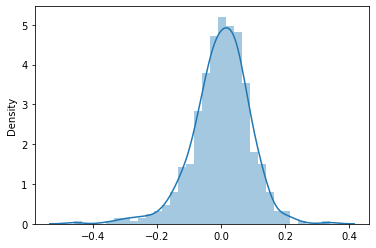

In [80]:
sns.distplot(res)       # distribution of error terms which is centered around 0 and normally distributed.

## Making Predictions on the Test Set and Evaluating it.

In [81]:
# 1. Fit this MinMax Scaler on the numerical columns except for the dummy vars.

num_vars=['cnt','hum','windspeed','temp']

# 2. Transform on Data (all the values lies between 0 and 1)

df_test[num_vars]=scaler.transform(df_test[num_vars])
df_test.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_light snow,weathersit_mist
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [82]:
df_test.describe()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_light snow,weathersit_mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
# testing the model (splitting the df_train into X_test and y_test)

y_test=df_test.pop('cnt')
X_test=df_test

In [84]:
X_test_sm=sm.add_constant(X_test)


In [85]:
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_light snow,weathersit_mist
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1.0,1,0,1,0.901354,0.610133,0.153728,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,1.0,0,0,0,0.511964,0.837699,0.334206,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,0,0.817246,0.314298,0.537414,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [86]:
# Dropping the unnecessary variable.

X_test_sm=X_test_sm.drop(['mnth_Mar','mnth_Oct','weekday_Thrusday','mnth_Jun','weekday_Sunday','weekday_Saturday','workingday'
                         ,'mnth_Aug','weekday_Wednesday','mnth_May','mnth_Feb','hum'],axis=1)

In [87]:
# Predictions

y_test_pred =lr_model13.predict(X_test_sm)

In [88]:
# Evaluation of the model

r2_score(y_true=y_test,y_pred=y_test_pred)

0.818729802570822

### Here we see that the r2_score on the test set is 0.82 and on the train set it is 0.84 which is pretty reasonable ,that shows our model is very good.